In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_dataset("radyn_out_vars.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:          (time: 45864, z_idx: 300, wavelength_ha: 201, wavelength_hb: 201, wavelength_cak: 201, wavelength_8542: 201)
Coordinates:
  * time             (time) float64 0.0 0.1 0.2 ... 6.538e+03 6.538e+03
  * wavelength_ha    (wavelength_ha) float64 652.1 653.7 654.6 ... 659.3 660.9
  * wavelength_hb    (wavelength_hb) float64 483.0 484.2 484.9 ... 488.4 489.6
  * wavelength_cak   (wavelength_cak) float64 385.7 387.7 389.2 ... 399.4 401.6
  * wavelength_8542  (wavelength_8542) float64 848.7 850.1 851.1 ... 858.8 860.2
Dimensions without coordinates: z_idx
Data variables:
    temperature      (time, z_idx) float64 ...
    ne               (time, z_idx) float64 ...
    vz               (time, z_idx) float64 ...
    dens             (time, z_idx) float64 ...
    z                (time, z_idx) float64 ...
    ha               (time, wavelength_ha) float64 ...
    hb               (time, wavelength_hb) float64 ...
    ca_k             (time, wavelength_cak) float64 ...
    ca_8542          (time, wavelength_8542) float64 ...

interactive(children=(IntSlider(value=20000, description='t', max=22000, min=20000, step=10), Output()), _dom_…

<function __main__.plot_temperature(t)>

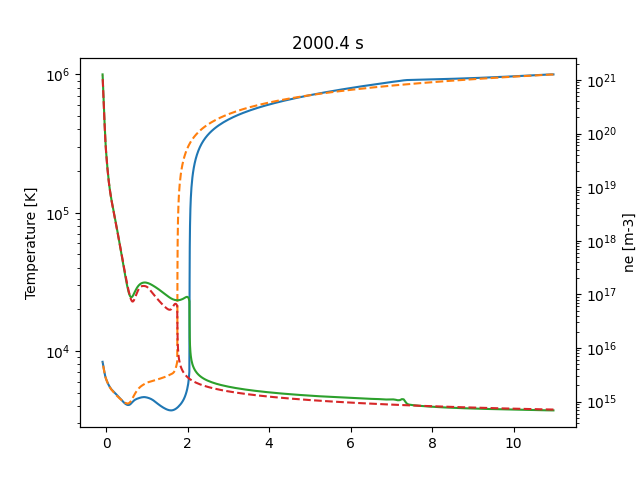

In [6]:
import ipywidgets as widgets
plt.figure()

def plot_temperature(t):
    plt.clf()
    plt.semilogy(ds.z[t] / 1e8, ds.temperature[t])
    plt.semilogy(ds.z[0] / 1e8, ds.temperature[0], '--')
    plt.ylabel("Temperature [K]")
    ax = plt.twinx()
    plt.semilogy(ds.z[t] / 1e8, ds.ne[t] * 1e6, c='C2')
    plt.semilogy(ds.z[0] / 1e8, ds.ne[0] * 1e6, '--', c='C3')
    plt.title(f"{ds.time[t].values} s")
    plt.xlabel("z [Mm]")
    plt.ylabel("ne [m-3]")

# widgets.interact(plot_temperature, t=widgets.IntSlider(min=0, max=ds.time.shape[0]-1, step=10))
# widgets.interact(plot_temperature, t=widgets.IntSlider(min=39970, max=41970, step=10))
widgets.interact(plot_temperature, t=widgets.IntSlider(min=20000, max=22000, step=10))

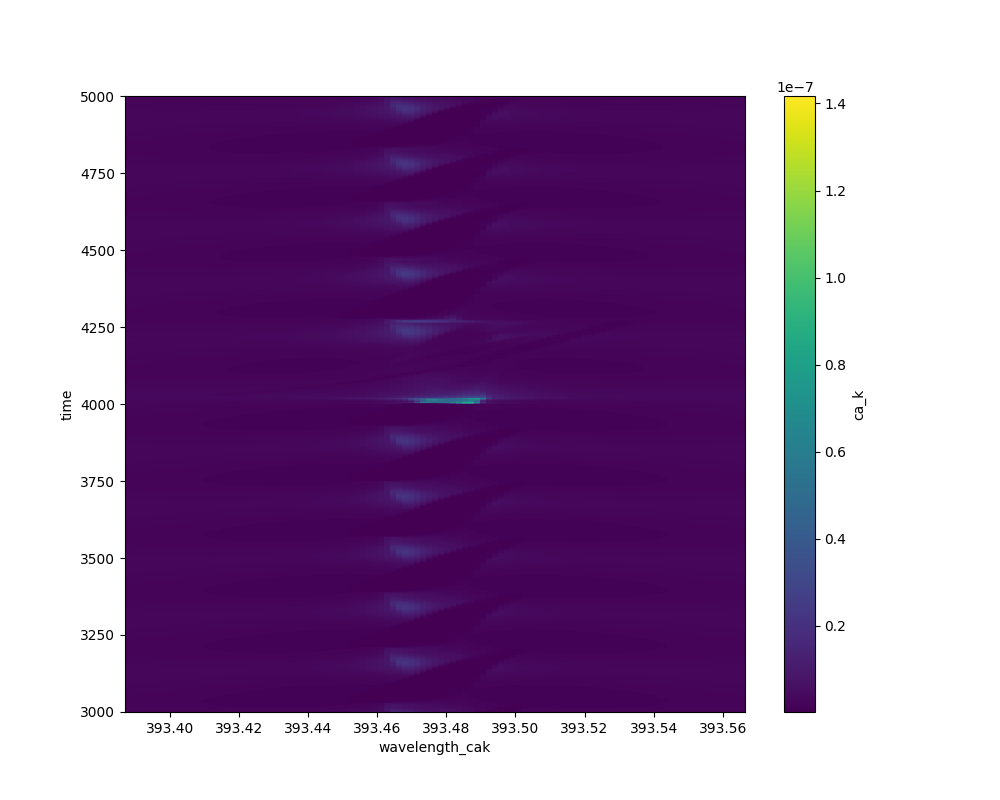

In [5]:
plt.figure(figsize=(10, 8))
lambda0 = ds.wavelength_cak[ds.wavelength_cak.shape[0] // 2]
ds.ca_k.sel(time=slice(3000.0, 5000.0), wavelength_cak=slice(lambda0 - 0.09, lambda0 + 0.09)).plot(x="wavelength_cak", y="time")

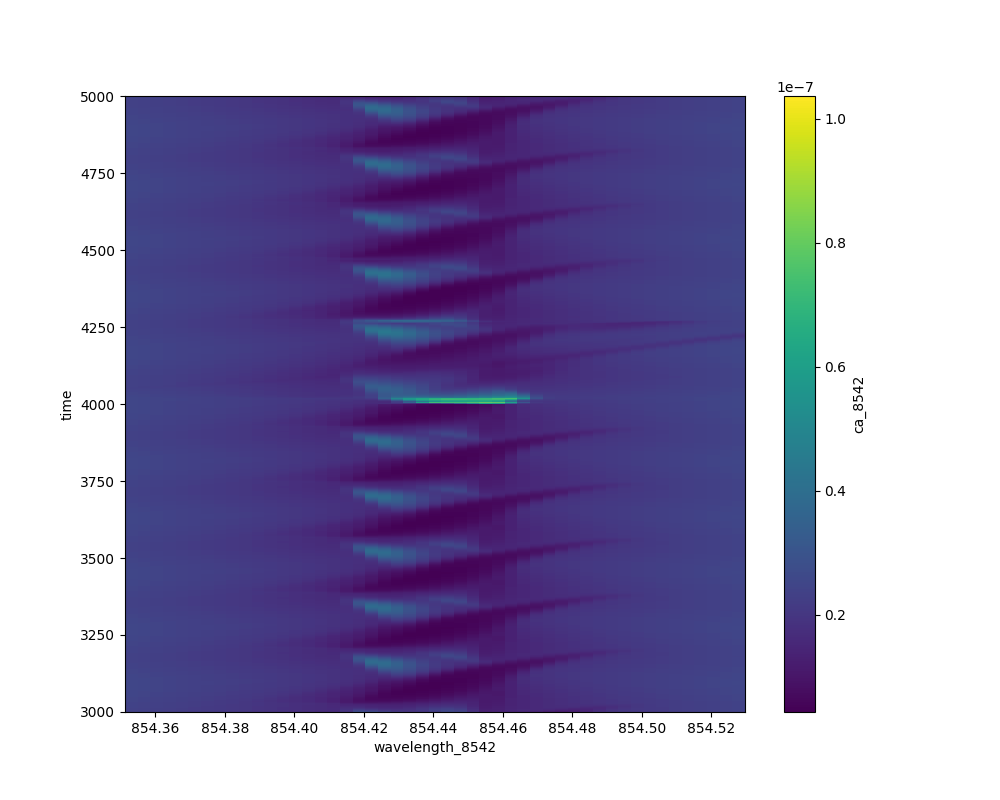

In [6]:
plt.figure(figsize=(10, 8))
lambda0 = ds.wavelength_8542[ds.wavelength_8542.shape[0] // 2]
ds.ca_8542.sel(time=slice(3000.0, 5000.0), wavelength_8542=slice(lambda0 - 0.09, lambda0 + 0.09)).plot(x="wavelength_8542", y="time")

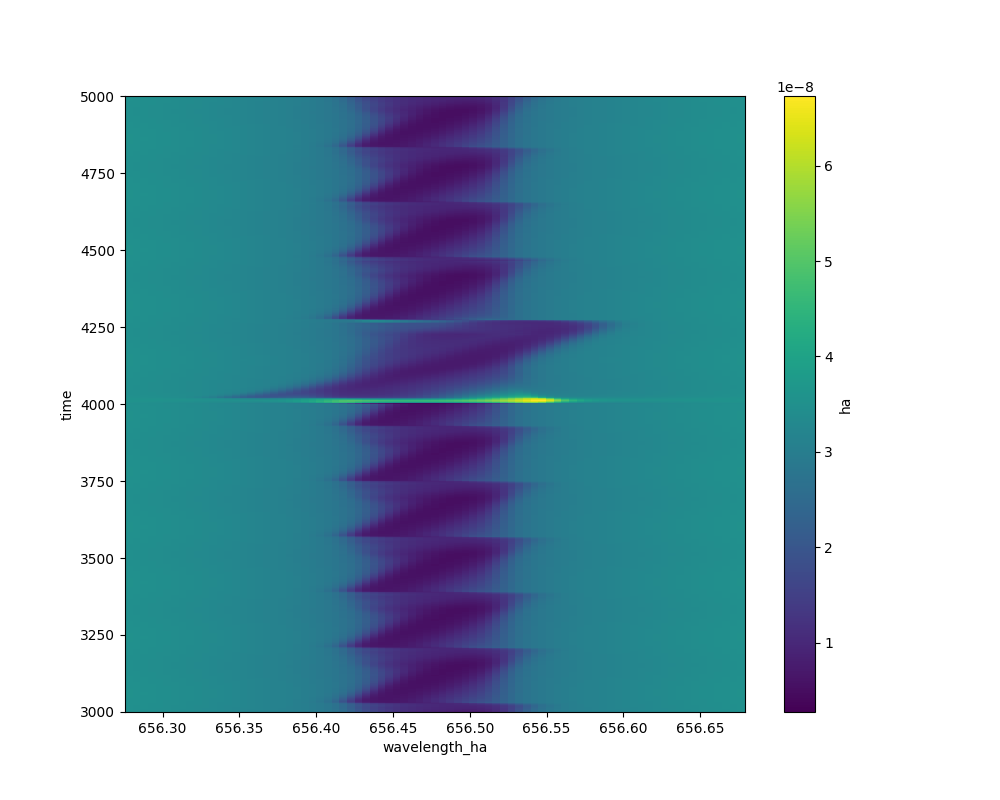

In [7]:
plt.figure(figsize=(10, 8))
lambda0 = ds.wavelength_ha[ds.wavelength_ha.shape[0] // 2]
ds.ha.sel(time=slice(3000.0, 5000.0), wavelength_ha=slice(lambda0 - 0.20, lambda0 + 0.20)).plot(x="wavelength_ha", y="time")

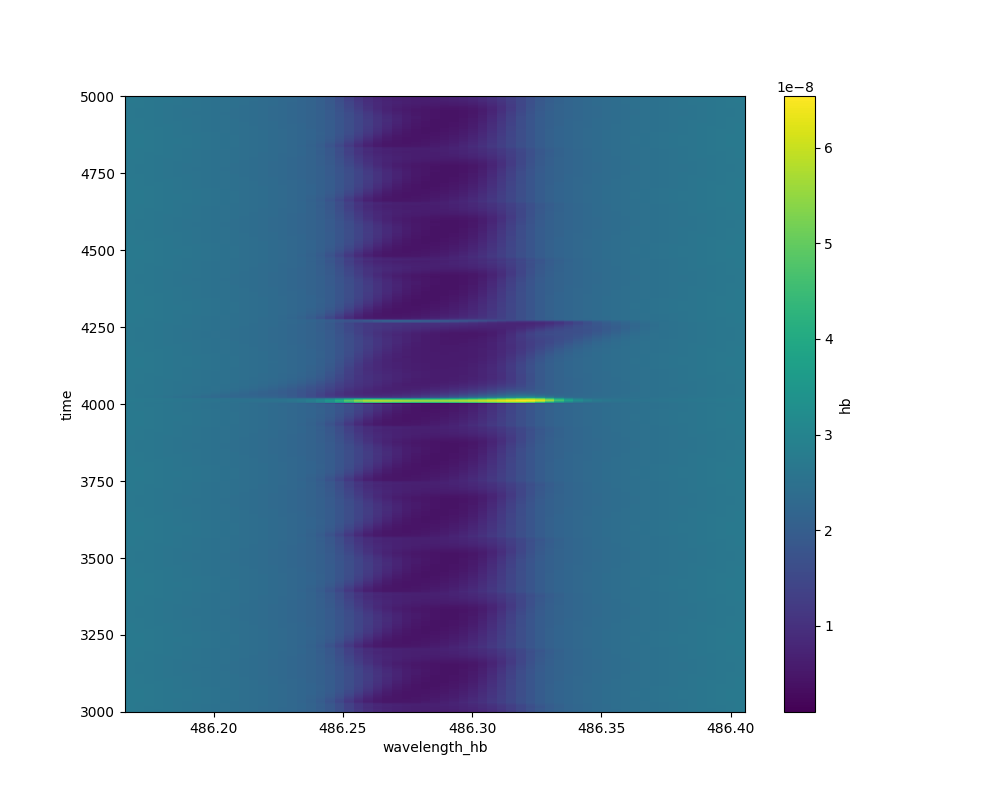

In [8]:
plt.figure(figsize=(10, 8))
lambda0 = ds.wavelength_hb[ds.wavelength_hb.shape[0] // 2]
ds.hb.sel(time=slice(3000.0, 5000.0), wavelength_hb=slice(lambda0 - 0.12, lambda0 + 0.12)).plot(x="wavelength_hb", y="time")

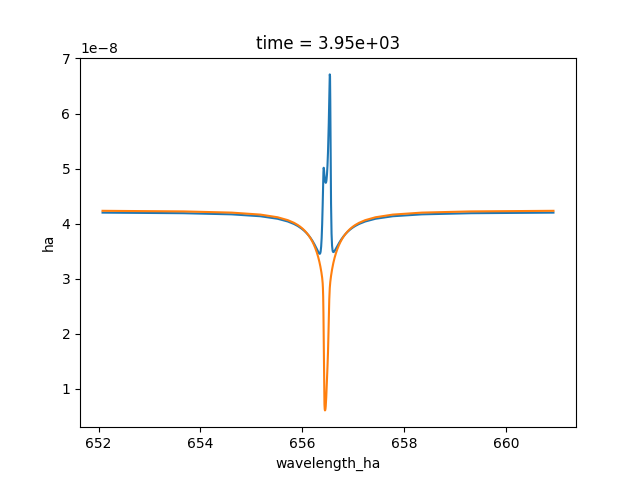

In [9]:
plt.figure()
ds.ha.sel(time=4010.0).plot()
ds.ha.sel(time=3950.0).plot()